# Exploratory Data Analysis of Brazilian E-Commerce (Olist)

## Internship: CodeAlpha Data Analytics  
## Author: Aditya Mankar  
## Tools: Python, Pandas, NumPy, Matplotlib, Seaborn  
## Dataset: Brazilian E-Commerce Public Dataset by Olist (2016–2018)

## 1. Project Overview

This project performs exploratory data analysis (EDA) on a real-world Brazilian e-commerce dataset provided by Olist. 
The objective is to understand sales trends, customer behavior, delivery performance, and payment patterns to derive meaningful business insights.


## 2. Dataset Description

The dataset contains information of 100,000+ orders made between 2016 and 2018 across multiple marketplaces in Brazil. 
It includes several tables such as orders, order items, customers, payments, products, and reviews.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\hr data\codeAlpha_projects\odeAlpha_Olist_EDA\data\olist_orders_dataset.csv")
items = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\hr data\codeAlpha_projects\odeAlpha_Olist_EDA\data\olist_order_items_dataset.csv")
customers = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\hr data\codeAlpha_projects\odeAlpha_Olist_EDA\data\olist_customers_dataset.csv")
payments = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\hr data\codeAlpha_projects\odeAlpha_Olist_EDA\data\olist_order_payments_dataset.csv")
products = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\hr data\codeAlpha_projects\odeAlpha_Olist_EDA\data\olist_products_dataset.csv")
reviews = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\hr data\codeAlpha_projects\odeAlpha_Olist_EDA\data\olist_order_reviews_dataset.csv")

## 3. Data Understanding
In this section, we explore the structure, size, and columns of each dataset.

### Orders Dataset

This table contains the core information about each order, including order status, purchase timestamp, delivery dates, and customer reference.

In [3]:
print("ORDERS TABLE")
orders.shape
orders.info()
orders.head()

ORDERS TABLE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Order Items Dataset

This table provides details of individual products within each order, including product price, freight value, and seller information.

In [4]:
print("ORDER ITEMS TABLE")
items.shape
items.info()
items.head()

ORDER ITEMS TABLE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Customers Dataset

This table includes customer-related information such as unique customer IDs, city, and state.

In [5]:
print("CUSTOMERS TABLE")
customers.shape
customers.info()
customers.head()


CUSTOMERS TABLE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Payments Dataset

This table records payment details for each order, including payment type, number of installments, and payment value.

In [6]:
print("PAYMENTS TABLE")
payments.shape
payments.info()
payments.head()

PAYMENTS TABLE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Products Dataset

This table contains product-level information such as product category, product weight, and product dimensions.

In [7]:
print("PRODUCTS TABLE")
products.shape
products.info()
products.head()

PRODUCTS TABLE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Reviews Dataset

This table includes customer feedback in the form of review scores and textual comments for each order.

In [8]:
print("REVIEWS TABLE")
reviews.shape
reviews.info()
reviews.head()

REVIEWS TABLE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## 4. Data Cleaning

In this section, we check for missing values, duplicate records, and correct data types to ensure data quality before analysis.

In [15]:
# Check Missing Values
orders.isnull().sum()
# Convert date columns to datetime
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col])

In [16]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## 5. Exploratory Data Analysis (EDA)


### Q1: What is the total number of unique orders?


In [18]:
orders['order_id'].nunique()

99441

### Q2: How many orders were placed each year?


In [21]:
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['year'].value_counts().sort_index()

year
2016      329
2017    45101
2018    54011
Name: count, dtype: int64

### Q3: What is the distribution of order status?


In [23]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

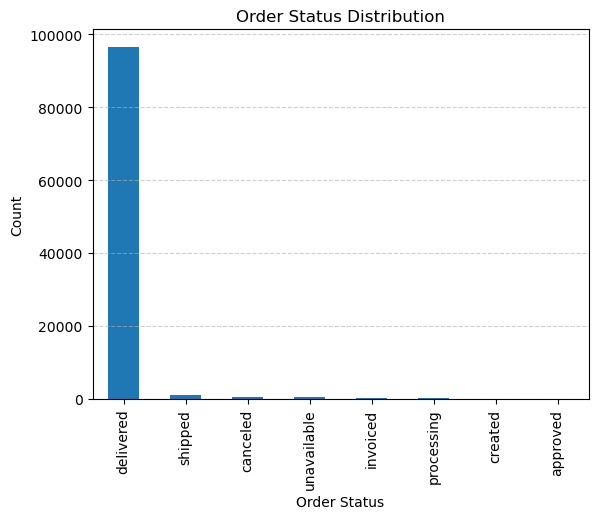

In [29]:
orders['order_status'].value_counts().plot(kind='bar')
plt.title("Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Insight:** The majority of orders are successfully delivered, indicating strong logistics and operational performance.


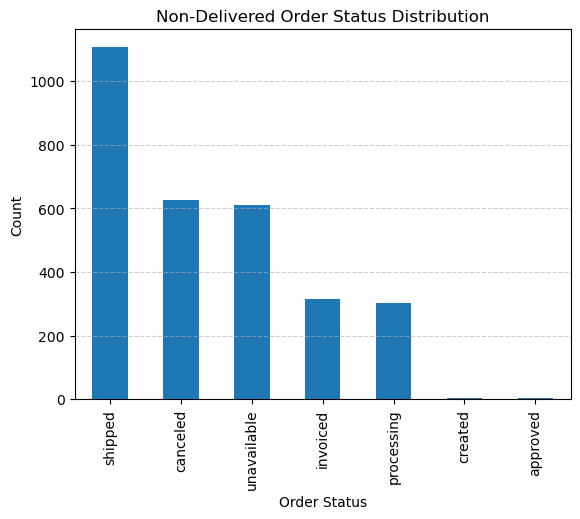

In [30]:
orders[orders['order_status'] != 'delivered']['order_status'].value_counts().plot(kind='bar')
plt.title("Non-Delivered Order Status Distribution")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.grid(axis= 'y', linestyle= '--', alpha =0.6)
plt.show()


**Insight:** Among non-delivered orders, most are in shipped and canceled states, which may indicate delivery delays or customer issues.


### Q4: What is the total revenue generated?

In [38]:
total_revenue= (items['price'].sum())
formatted_revenue = f"R${total_revenue:,.2f}"
formatted_revenue

'R$13,591,643.70'

### Q5: What is the average order value?


In [39]:
items.groupby('order_id')['price'].sum().mean()

np.float64(137.75407637889444)

### Q6: How does the number of orders vary by month?


In [40]:
orders['month']=  orders['order_purchase_timestamp'].dt.month
orders.groupby('month')['order_id'].nunique()

month
1      8069
2      8508
3      9893
4      9343
5     10573
6      9412
7     10318
8     10843
9      4305
10     4959
11     7544
12     5674
Name: order_id, dtype: int64

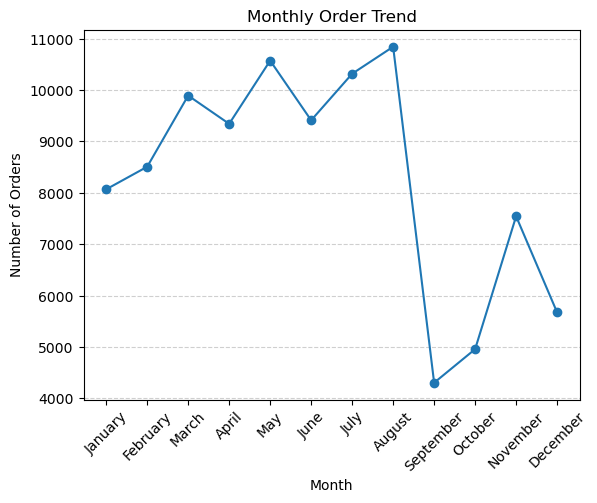

In [44]:
import calendar

monthly_orders = orders.groupby('month')['order_id'].nunique()

monthly_orders.plot(kind='line', marker='o')
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")

plt.xticks(ticks=range(1,13), labels=[calendar.month_name[i] for i in range(1,13)], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Q7: Which are the top 10 products by revenue?


In [47]:
items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [48]:
top_products= items.groupby('product_id')['price'].sum().sort_values(ascending= False).head(10)
top_products

product_id
bb50f2e236e5eea0100680137654686c    63885.00
6cdd53843498f92890544667809f1595    54730.20
d6160fb7873f184099d9bc95e30376af    48899.34
d1c427060a0f73f6b889a5c7c61f2ac4    47214.51
99a4788cb24856965c36a24e339b6058    43025.56
3dd2a17168ec895c781a9191c1e95ad7    41082.60
25c38557cf793876c5abdd5931f922db    38907.32
5f504b3a1c75b73d6151be81eb05bdc9    37733.90
53b36df67ebb7c41585e8d54d6772e08    37683.42
aca2eb7d00ea1a7b8ebd4e68314663af    37608.90
Name: price, dtype: float64

### Q8: What are the most used payment methods?


In [51]:
payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

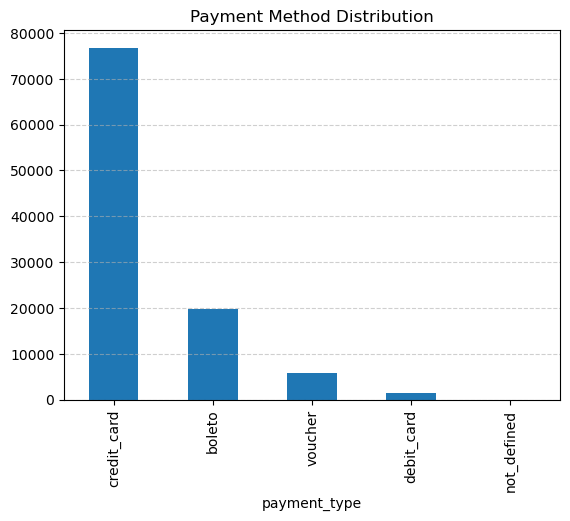

In [53]:
payments['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Method Distribution')
plt.grid(axis = 'y', linestyle= '--', alpha= 0.6)
plt.show()

### Q9: Which states have the highest number of customers?


In [54]:
customers['customer_state'].value_counts().head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

### Q10: What is the average delivery time?


In [55]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,2018-07


In [63]:
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()

delivered_orders['delivery_time'] = (
    delivered_orders['order_delivered_customer_date'] -
    delivered_orders['order_purchase_timestamp']
).dt.days

delivered_orders['delivery_time'].mean().round(3)


np.float64(12.094)

**Insight:** The average delivery time for successfully delivered orders is approximately 12.094 days.


Note:- Cancelled and undelivered orders were excluded to rnsure accurate delivery metrics.

## 6. Key Business Insights


- The majority of orders were placed in 2017 and 2018, indicating rapid business growth.
- Most orders are successfully delivered, reflecting strong logistics performance.
- The total revenue generated is approximately R$ 13.6 million.
- The average order value is around R$ 137.75.
- Credit card is the most preferred paynment method among customers.
- The average delivery time for delivered orders is approximately 12.094 days.

## 7. Conclusion

This exploratory data analysis provided valuable insights into customer behavior, sales trends, and operational performance of the Olist e-commerce platform. The findings can support data-driven decision making for improving logistics, marketing strategies, and overall business performance.
